# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from skimage.io import imread, imshow
from skimage import transform, img_as_float, filters
from skimage.color import rgb2gray
import glob
import math
from importlib import reload
import scipy

### Import the custom KaggleAmazonMain module

In [2]:
cwd = os.getcwd()
path = os.path.join(cwd, '..', 'src')
if not path in sys.path:
    sys.path.append(path)
del cwd, path

import KaggleAmazonMain

In [3]:
reload(KaggleAmazonMain)

<module 'KaggleAmazonMain' from 'C:\\Users\\ablin\\Documents\\Kaggle\\kaggle_UnderstandingAmazonFromSpace\\develop\\..\\src\\KaggleAmazonMain.py'>

# Load training image data

In [4]:
X_train, y_train, names_train, tagged_df = KaggleAmazonMain.load_training_data(sampleOnly=False)

cwd C:\Users\ablin\Documents\Kaggle\kaggle_UnderstandingAmazonFromSpace\develop
Loading FULL jpg image dataset
number of files:  40479
processing 1000 of 40479
processing 2000 of 40479
processing 3000 of 40479
processing 4000 of 40479
processing 5000 of 40479
processing 6000 of 40479
processing 7000 of 40479
processing 8000 of 40479
processing 9000 of 40479
processing 10000 of 40479
processing 11000 of 40479
processing 12000 of 40479
processing 13000 of 40479
processing 14000 of 40479
processing 15000 of 40479
processing 16000 of 40479
processing 17000 of 40479
processing 18000 of 40479
processing 19000 of 40479
processing 20000 of 40479
processing 21000 of 40479
processing 22000 of 40479
processing 23000 of 40479
processing 24000 of 40479
processing 25000 of 40479
processing 26000 of 40479
processing 27000 of 40479
processing 28000 of 40479
processing 29000 of 40479
processing 30000 of 40479
processing 31000 of 40479
processing 32000 of 40479
processing 33000 of 40479
processing 34000

In [13]:
X_train.head()

,b_bimodal,b_kurtosis,b_max,b_mean,b_min,b_skew,b_std,g_bimodal,g_kurtosis,g_max,...,r_skew,r_std,sobel_colmean_std,sobel_kurtosis,sobel_max,sobel_mean,sobel_min,sobel_rowmean_std,sobel_skew,sobel_std
0,0.01,0.584727,0.462745,0.406310,0.356863,0.143465,0.010151,0.01,0.468081,0.490196,...,0.349179,0.016714,0.005138,1.217262,0.041441,0.008595,0.0,0.001003,0.924947,0.005138
1,0.06,2.618875,0.513725,0.252163,0.149020,1.108335,0.037304,0.15,-0.223049,0.603922,...,1.192432,0.070699,0.013688,11.418476,0.155384,0.016621,0.0,0.003938,2.547510,0.013688
2,0.05,-0.771360,0.388235,0.198906,0.105882,0.312114,0.031379,0.07,-0.775967,0.415686,...,0.378112,0.073480,0.009609,7.456124,0.136638,0.012053,0.0,0.002302,1.986216,0.009609
3,0.02,14.326384,0.874510,0.427071,0.313725,3.669470,0.047856,0.03,13.894092,0.882353,...,3.555662,0.090548,0.012798,53.560918,0.271884,0.006004,0.0,0.003478,6.146419,0.012798
4,0.29,-0.224812,0.952941,0.494552,0.298039,1.066036,0.175244,0.54,-0.519344,0.964706,...,0.918842,0.212183,0.014765,2.781539,0.124231,0.019790,0.0,0.003197,1.409351,0.014765


In [15]:
X_train.describe()

,b_bimodal,b_kurtosis,b_max,b_mean,b_min,b_skew,b_std,g_bimodal,g_kurtosis,g_max,...,r_skew,r_std,sobel_colmean_std,sobel_kurtosis,sobel_max,sobel_mean,sobel_min,sobel_rowmean_std,sobel_skew,sobel_std
count,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,...,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.0,40479.000000,40479.000000,40479.000000
mean,0.037349,4.591666,0.500522,0.298830,0.210140,0.926876,0.035437,0.045882,3.324470,0.553394,...,0.825220,0.053383,0.009467,6.670636,0.095850,0.013078,0.0,0.002241,1.657571,0.009467
std,0.069789,11.528801,0.194798,0.127996,0.124591,1.346190,0.034982,0.078006,9.388228,0.190678,...,1.282003,0.044307,0.004678,15.278270,0.054949,0.005722,0.0,0.001389,1.107029,0.004678
min,0.000000,-1.892600,0.098039,0.013848,0.000000,-8.595220,0.002449,0.000000,-1.904844,0.188235,...,-10.893046,0.002452,0.000343,-0.139698,0.003602,0.000085,0.0,0.000116,0.542032,0.000343
25%,0.010000,0.303400,0.337255,0.204952,0.121569,0.059571,0.015466,0.020000,0.141957,0.384314,...,0.056587,0.023491,0.006624,1.160826,0.060773,0.009292,0.0,0.001438,0.908794,0.006624
50%,0.020000,0.900927,0.466667,0.266938,0.180392,0.401520,0.021546,0.020000,0.629165,0.529412,...,0.402548,0.035303,0.009019,2.584881,0.083383,0.013254,0.0,0.001950,1.237125,0.009019
75%,0.030000,4.396050,0.631373,0.372502,0.274510,1.498954,0.041279,0.040000,2.993760,0.690196,...,1.403234,0.071083,0.011464,7.626368,0.120664,0.016603,0.0,0.002623,2.123407,0.011464
max,0.810000,555.288088,1.000000,0.957261,0.929412,19.972132,0.329120,0.780000,436.637585,1.000000,...,18.419069,0.317581,0.049561,1034.726575,0.546404,0.056375,0.0,0.017566,25.443085,0.049561


In [16]:
y_train

,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
train_0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
train_1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
train_10,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1
train_100,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
train_1000,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
train_10000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
train_10001,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
train_10002,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
train_10003,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
train_10004,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [17]:
y_train.describe()

,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
count,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000
mean,0.304800,0.008375,0.021221,0.008202,0.002495,0.696732,0.057561,0.002470,0.112330,0.090467,0.066578,0.179130,0.934806,0.199511,0.008399,0.005163,0.179402
std,0.460328,0.091131,0.144122,0.090193,0.051354,0.459676,0.232914,0.049642,0.321206,0.286853,0.249292,0.383466,0.246871,0.399638,0.091264,0.071670,0.383693
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### See distribution of label counts. Note a significant imbalance.

There are 17 unique tags in this data


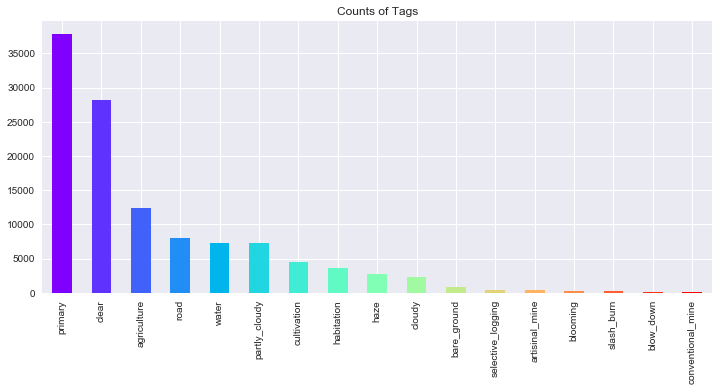

primary              37840
clear                28203
agriculture          12338
road                  8076
water                 7262
partly_cloudy         7251
cultivation           4547
habitation            3662
haze                  2695
cloudy                2330
bare_ground            859
selective_logging      340
artisinal_mine         339
blooming               332
slash_burn             209
blow_down              101
conventional_mine      100
dtype: int64

In [6]:
#Barplot of tag counts
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 5)
print('There are {} unique tags in this data'.format(len(tagged_df.columns)))
colors = cm.rainbow(np.linspace(0, 1, len(tagged_df.columns)))
tagged_df.sum().sort_values(ascending=False).plot(title="Counts of Tags", color=colors, kind='bar')
plt.show()
tagged_df.sum().sort_values(ascending=False)

### Get a feel for the size and shape of the data

In [7]:
# n files, images are 256x256 pixels, with a channel dimension size 3 = RGB
print('X_train is a {} object'.format(type(X_train)))
print('it has shape {}'.format(X_train.shape))

X_train is a <class 'pandas.core.frame.DataFrame'> object
it has shape (40479, 29)


In [10]:
print('y_train is a {} object'.format(type(y_train)))
print('it has {} elements'.format(len(y_train)))

y_train is a <class 'pandas.core.frame.DataFrame'> object
it has 40479 elements


In [11]:
print('names_train is a {} object'.format(type(names_train)))
print('it has {} elements'.format(len(names_train)))
print('each element is of type {}'.format(type(names_train)))

names_train is a <class 'list'> object
it has 40479 elements
each element is of type <class 'list'>


# Exploratory plotting

## Plot some random images with their labels

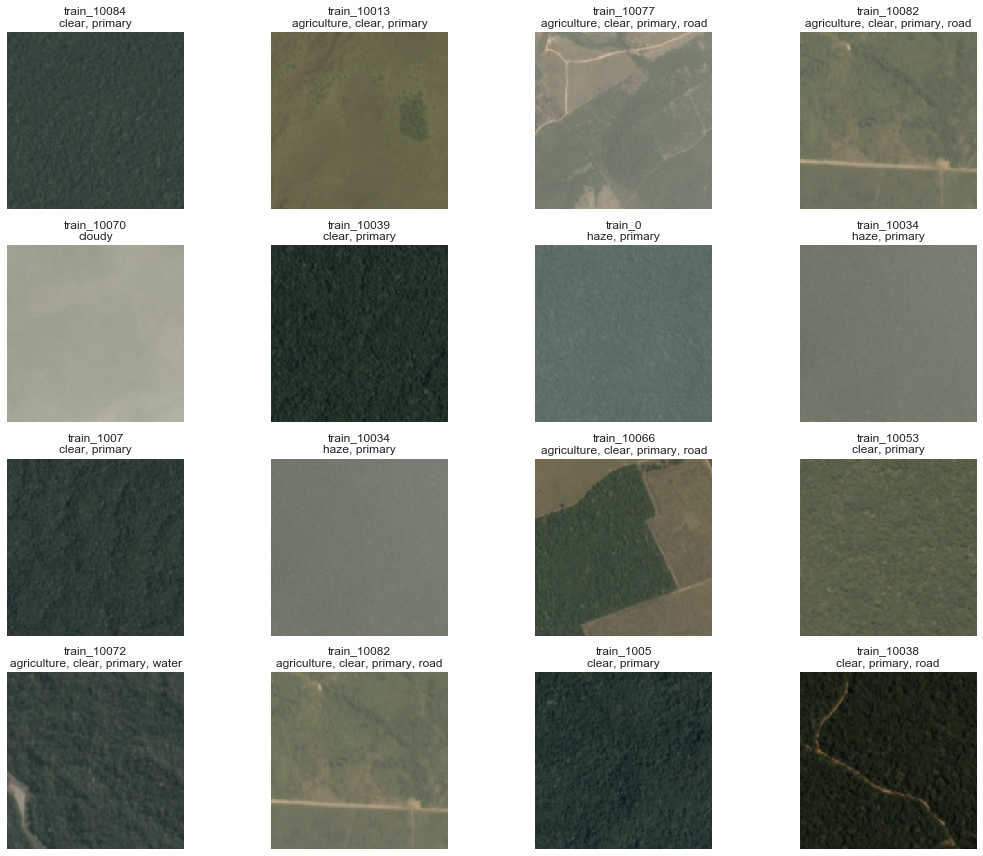

In [118]:
KaggleAmazonMain.plot_samples(X_train, names_train, tagged_df, 4,4)

## Plot images with labels and their RGB intensity distributions

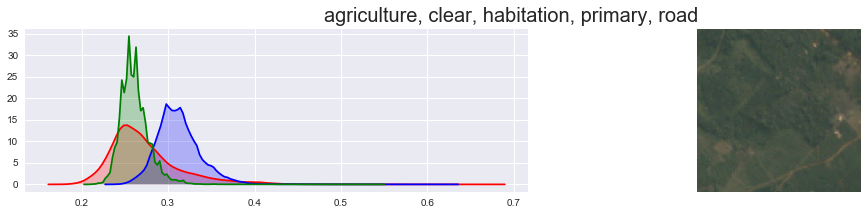

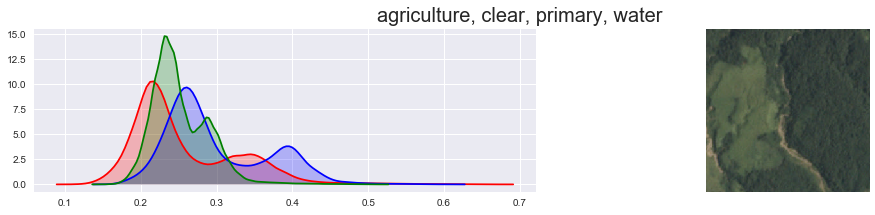

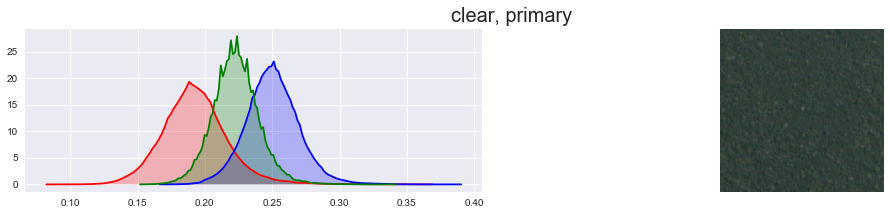

In [16]:
plt.subplots_adjust(wspace=0, hspace=0)
for i in range(0,3):
    sample = np.random.randint(low=0, high=X_train.shape[0]-1, size = 1)
    ind = names_train[sample[0]]
    tags = KaggleAmazonMain.get_labels(ind, tagged_df)
    KaggleAmazonMain.plot_rgb_dist(X_train[sample[0],:,:,:],tags)

## Plot sobels of some images with labels

In [18]:
X_train_g = rgb2gray(X_train)

X_train_sobel = []
for i in range(X_train_g.shape[0]):
    X_train_sobel.append(filters.sobel(X_train_g[i]))
X_train_sobel = np.asarray(X_train_sobel)

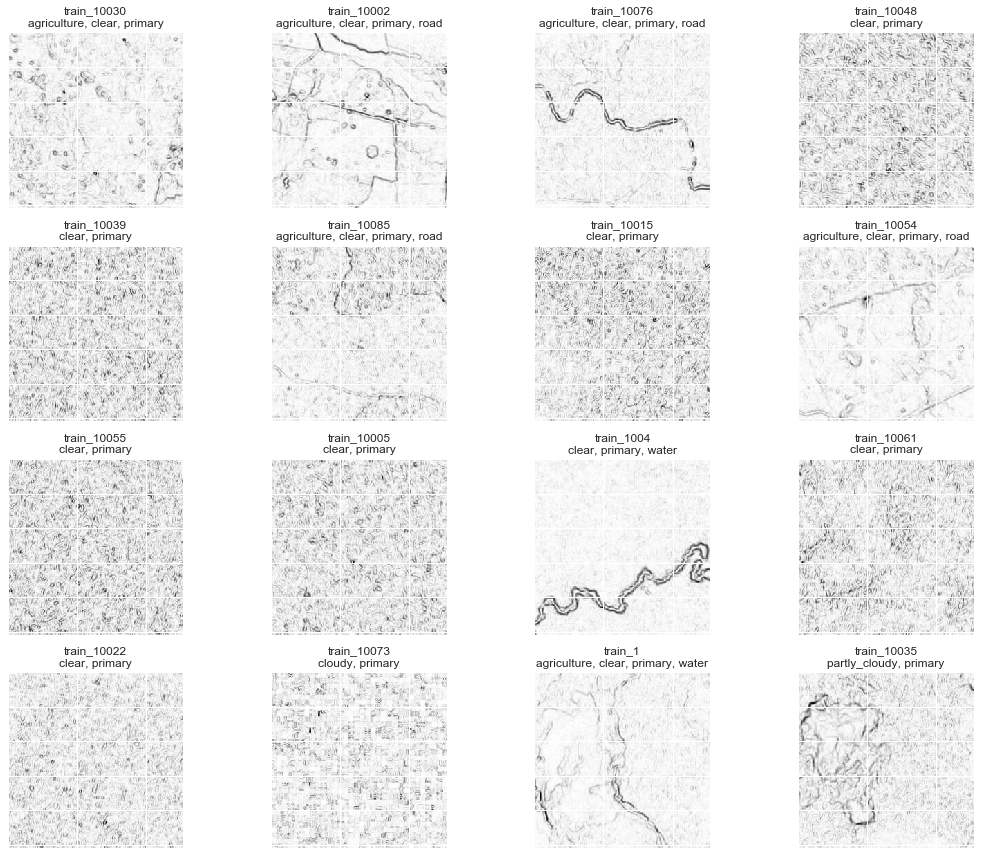

In [19]:
KaggleAmazonMain.plot_samples(X_train_sobel, names_train, tagged_df, 4,4)

# Develop predictive models

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rf = RandomForestClassifier(n_estimators = 10, 
                            max_features = 'sqrt',
                            bootstrap = True, 
                            oob_score = True,
                            n_jobs = -1)

In [106]:
rf.fit(features, y_train_df)

C:\Users\ablin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ablin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [114]:
rf.predict(features)[0,:]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
        0.,  0.,  0.,  0.])

In [115]:
y_train[0]

agriculture          0
artisinal_mine       0
bare_ground          0
blooming             0
blow_down            0
clear                0
cloudy               0
conventional_mine    0
cultivation          0
habitation           0
haze                 1
partly_cloudy        0
primary              1
road                 0
selective_logging    0
slash_burn           0
water                0
Name: train_0, dtype: uint8